# Laptop Price Analysis


## Importing Data


The csv file bellow is from https://www.kaggle.com/datasets/sagaraiarchitect/laptop-price-explorer-the-ml-model

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('laptops.csv')
data.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


## Exploring data characters

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


In [4]:
data.columns

Index(['CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
data[['CompanyName', 'Price']]

,CompanyName,Price
0,MSI,35844.099371
1,Chuwi,37019.059051
2,hp,33329.360341
3,MSI,68631.102486
4,Microsoft,33842.479566
...,...,...
995,hp,40254.533272
996,Microsoft,57272.697780
997,lenevo,48214.606894
998,Asus,58926.553683


In [6]:
data.CompanyName.unique()

array(['MSI', 'Chuwi', 'hp', 'Microsoft', 'Apple', 'lenevo', 'Asus',
       'Acer', 'Dell'], dtype=object)

In [7]:
# getting a comparation between the mean price for each company
price_per_company = data.groupby('CompanyName')[['Price']].mean().sort_values('Price')

<Axes: title={'center': "Average price for each company's laptop"}, ylabel='CompanyName'>

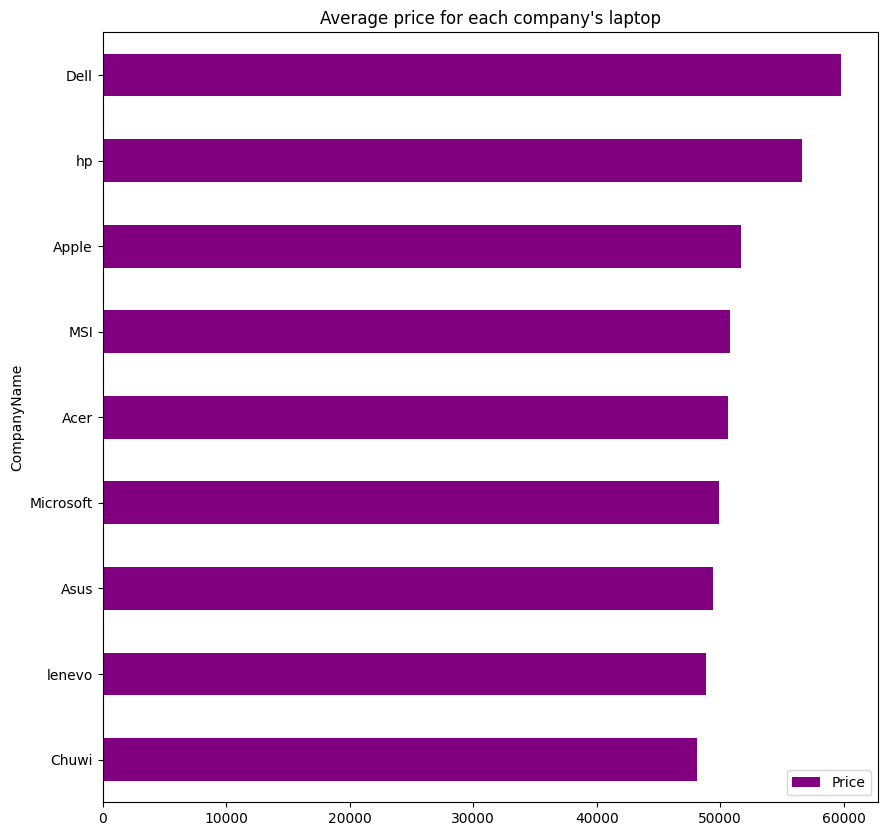

In [8]:
# now, here is a graphic of the results obtained in the last cell
import matplotlib.pyplot as plt
price_per_company.plot(kind='barh', figsize=(10, 10), color='purple', title='Average price for each company\'s laptop')

Now, I'm going to plot a graphic of how many laptops of each company was listed in the Data Set

In [9]:
percentage_each_company = data['CompanyName'].value_counts(normalize=True).sort_values().to_frame()

array([<Axes: ylabel='CompanyName'>], dtype=object)

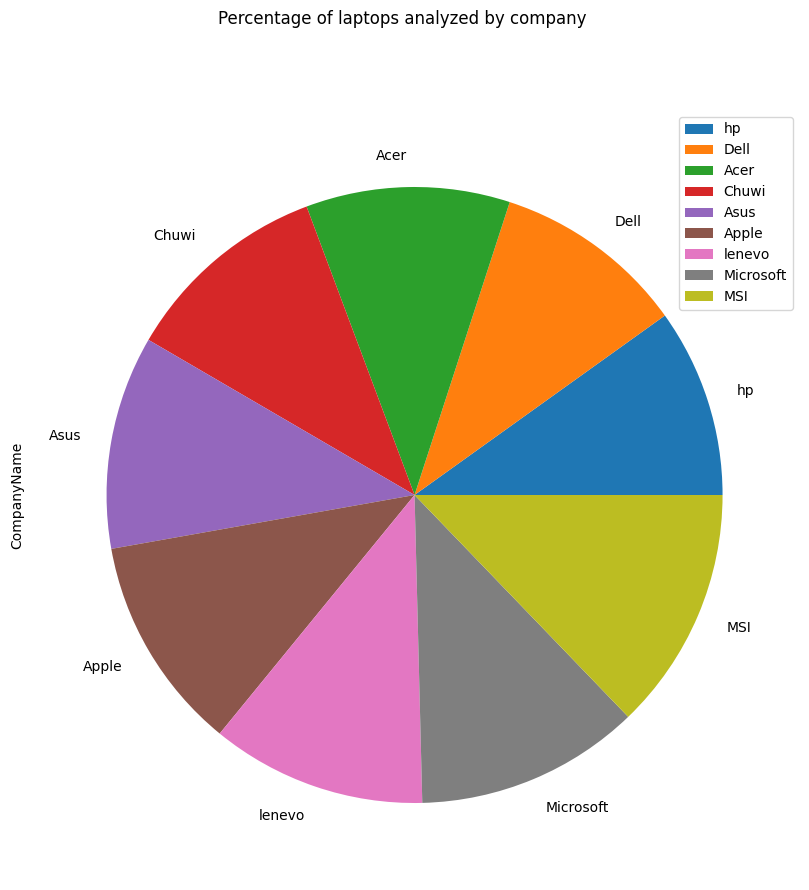

In [10]:
percentage_each_company.plot(kind='pie', figsize=(10, 10), title='Percentage of laptops analyzed by company', subplots=True)

Now, I'm searching for null data in the table

In [11]:
data.isnull().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Well, there is no null data in the file, it's good!

# Applying filters

In [12]:
data

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566
...,...,...,...,...,...,...,...,...,...,...,...
995,hp,Gaming,16.242566,HD 1920x1080,AMD A9-Series 9420,8GB,128GB SSD,AMD Radeon RX 5600M,Windows 10,4.685053,40254.533272
996,Microsoft,WorkStation,17.450809,4K,Intel Celeron Dual Core 3855U,8GB,2TB SATA SSD,NVIDIA GeForce GTX 1650,macOS,3.934182,57272.697780
997,lenevo,NoteBook,13.761288,HD 1920x1080,AMD Ryzen 7,16GB,128GB PCIe SSD,NVIDIA GeForce GTX 1650,Windows 10,4.047468,48214.606894
998,Asus,UltraBook,11.038000,IPS Panel Retina Display 2560x1600,Intel Core i9,12GB,1TB Fusion Drive,Intel Iris Xe Graphics,No OS,3.669825,58926.553683


In [13]:
data.query('Weight < 4.0 & Price < 40000')

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
13,Apple,UltraBook,12.140047,2K,Intel Core i7,8GB,4TB HDD,NVIDIA GeForce GTX 1650,No OS,3.724435,34169.166205
17,Microsoft,UltraBook,13.983339,4K,Intel Xeon E3-1505M,4GB,6TB HDD,NVIDIA GeForce GTX 1650,Linux,2.809614,32270.293456
24,Chuwi,WorkStation,16.096161,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,2TB SATA SSD,NVIDIA GeForce GTX 1650,Linux,3.775666,38326.634266
...,...,...,...,...,...,...,...,...,...,...,...
964,hp,2 in 1 Convertible,15.749078,2K,Intel Core i9,4GB,256GB eMMC,AMD Radeon RX 5600M,macOS,3.395021,31747.899092
967,lenevo,Business Laptop,13.481513,IPS Panel Full HD / Touchscreen 1920x1080,AMD A9-Series 9420,16GB,2TB HDD,NVIDIA GeForce GTX 1650,macOS,2.234884,34949.847139
969,MSI,UltraBook,12.418419,HD 1920x1080,Intel Celeron Dual Core 3855U,12GB,512GB NVMe SSD,AMD Radeon RX 5600M,macOS,3.843726,31329.906541
988,MSI,NoteBook,17.119294,HD 1920x1080,Intel Atom x5-Z8550,16GB,2TB NVMe SSD,AMD Radeon RX 5600M,No OS,3.365919,32364.429847


In [14]:
data.Cpu.unique()

array(['Intel Core i7', 'Intel Core i5', 'Intel Xeon E3-1505M ',
       'Intel Atom x5-Z8550', 'Intel Celeron Dual Core 3855U ',
       'Intel Core i9', 'AMD A9-Series 9420', 'AMD Ryzen 5',
       'AMD Ryzen 7', 'Intel Pentium Quad Core N4200'], dtype=object)

<Axes: >

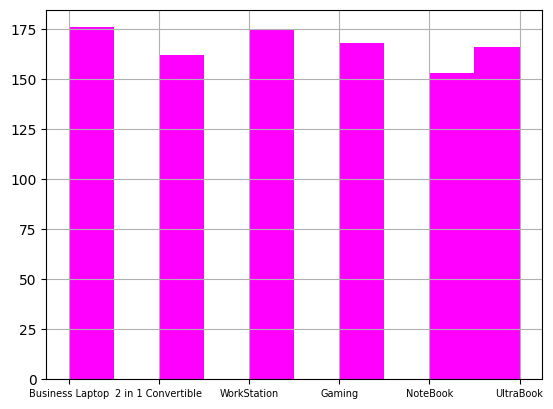

In [96]:
data.TypeOfLaptop.hist(color='magenta', xlabelsize=7)

In [31]:
data.head().T

,0,1,2,3,4
CompanyName,MSI,Chuwi,hp,MSI,Microsoft
TypeOfLaptop,Business Laptop,2 in 1 Convertible,WorkStation,2 in 1 Convertible,Gaming
Inches,17.04068,16.542395,17.295294,11.526203,12.649634
ScreenResolution,IPS Panel Retina Display 2560x1600,Full HD,Full HD,2K,Full HD
Cpu,Intel Core i7,Intel Core i5,Intel Xeon E3-1505M,Intel Core i7,Intel Core i5
Ram,12GB,12GB,8GB,16GB,8GB
Memory,512GB SSD,128GB PCIe SSD,1TB HDD,512GB NVMe SSD,512GB SSD
Gpu,Intel Iris Xe Graphics,Intel Iris Xe Graphics,Intel Iris Xe Graphics,Intel Iris Xe Graphics,AMD Radeon RX 5600M
OpSys,Linux,No OS,Linux,Windows 10,Windows 10
Weight,2.064834,4.060656,2.901689,2.914843,4.341995


In [39]:
media_preco_cpu = data.groupby(['TypeOfLaptop', 'Cpu'])[['Price']].mean().sort_values('Price')
media_preco_cpu

Price
TypeOfLaptop       Cpu                                         
UltraBook          Intel Xeon E3-1505M             45656.778224
Business Laptop    AMD Ryzen 7                     46063.464955
NoteBook           Intel Core i5                   46085.853116
                   Intel Pentium Quad Core N4200   46879.419696
Gaming             AMD Ryzen 5                     47403.704054
UltraBook          Intel Core i5                   47943.285748
2 in 1 Convertible Intel Core i5                   48045.447486
NoteBook           AMD Ryzen 7                     48452.579215
WorkStation        Intel Xeon E3-1505M             48747.295155
NoteBook           AMD Ryzen 5                     48766.646427
WorkStation        AMD A9-Series 9420              48978.754666
NoteBook           Intel Core i7                   49009.608117
Gaming             Intel Core i9                   49265.836352
2 in 1 Convertible AMD Ryzen 7                     49510.922296
UltraBook          Intel Pentium Quad Core N4200   49516.477787
WorkStation        AMD Ryzen 5                     49624.449504
UltraBook          Intel Core i9                   49677.063857
                   Intel Core i7                   49702.308891
                   Intel Atom x5-Z8550             49777.481545
NoteBook           Intel Atom x5-Z8550             50015.578431
2 in 1 Convertible Intel Celeron Dual Core 3855U   50541.845533
WorkStation        Intel Pentium Quad Core N4200   50730.280910
Business Laptop    Intel Core i9                   51068.791962
Gaming             AMD A9-Series 9420              51170.262738
UltraBook          AMD A9-Series 9420              51217.060526
Gaming             Intel Celeron Dual Core 3855U   51357.184124
Business Laptop    AMD Ryzen 5                     51419.744919
NoteBook           Intel Core i9                   51455.746136
UltraBook          AMD Ryzen 5                     51596.678416
WorkStation        Intel Core i5                   51785.252967
Business Laptop    AMD A9-Series 9420              51881.970564
2 in 1 Convertible AMD A9-Series 9420              51964.765509
WorkStation        Intel Atom x5-Z8550             52150.401042
Gaming             Intel Core i5                   52205.983452
                   Intel Core i7                   52268.575363
2 in 1 Convertible Intel Core i7                   52269.745773
                   AMD Ryzen 5                     52355.895329
NoteBook           AMD A9-Series 9420              52483.000683
2 in 1 Convertible Intel Xeon E3-1505M             52595.865091
Business Laptop    Intel Core i5                   52669.537183
Gaming             Intel Pentium Quad Core N4200   52784.757765
WorkStation        Intel Celeron Dual Core 3855U   52940.206653
                   Intel Core i9                   53059.150802
                   AMD Ryzen 7                     53131.321391
Gaming             Intel Atom x5-Z8550             53216.702270
                   Intel Xeon E3-1505M             53302.263388
Business Laptop    Intel Xeon E3-1505M             53392.252144
Gaming             AMD Ryzen 7                     54008.358842
UltraBook          Intel Celeron Dual Core 3855U   54051.078092
2 in 1 Convertible Intel Core i9                   54069.116592
WorkStation        Intel Core i7                   54151.378505
Business Laptop    Intel Celeron Dual Core 3855U   54185.708950
NoteBook           Intel Celeron Dual Core 3855U   54777.557874
Business Laptop    Intel Pentium Quad Core N4200   54863.380312
2 in 1 Convertible Intel Atom x5-Z8550             55491.794548
Business Laptop    Intel Core i7                   55754.645120
NoteBook           Intel Xeon E3-1505M             55905.199085
2 in 1 Convertible Intel Pentium Quad Core N4200   56739.419783
Business Laptop    Intel Atom x5-Z8550             57251.989853
UltraBook          AMD Ryzen 7                     58545.299608

In [40]:
media_preco_cpu = media_preco_cpu.pivot_table(index='Cpu', columns='TypeOfLaptop', values='Price')

In [41]:
media_preco_cpu

TypeOfLaptop,2 in 1 Convertible,Business Laptop,Gaming,NoteBook,UltraBook,WorkStation
Cpu,,,,,,
AMD A9-Series 9420,51964.765509,51881.970564,51170.262738,52483.000683,51217.060526,48978.754666
AMD Ryzen 5,52355.895329,51419.744919,47403.704054,48766.646427,51596.678416,49624.449504
AMD Ryzen 7,49510.922296,46063.464955,54008.358842,48452.579215,58545.299608,53131.321391
Intel Atom x5-Z8550,55491.794548,57251.989853,53216.702270,50015.578431,49777.481545,52150.401042
Intel Celeron Dual Core 3855U,50541.845533,54185.708950,51357.184124,54777.557874,54051.078092,52940.206653
Intel Core i5,48045.447486,52669.537183,52205.983452,46085.853116,47943.285748,51785.252967
Intel Core i7,52269.745773,55754.645120,52268.575363,49009.608117,49702.308891,54151.378505
Intel Core i9,54069.116592,51068.791962,49265.836352,51455.746136,49677.063857,53059.150802
Intel Pentium Quad Core N4200,56739.419783,54863.380312,52784.757765,46879.419696,49516.477787,50730.280910


array([<Axes: xlabel='Cpu'>, <Axes: xlabel='Cpu'>, <Axes: xlabel='Cpu'>,
       <Axes: xlabel='Cpu'>, <Axes: xlabel='Cpu'>, <Axes: xlabel='Cpu'>],
      dtype=object)

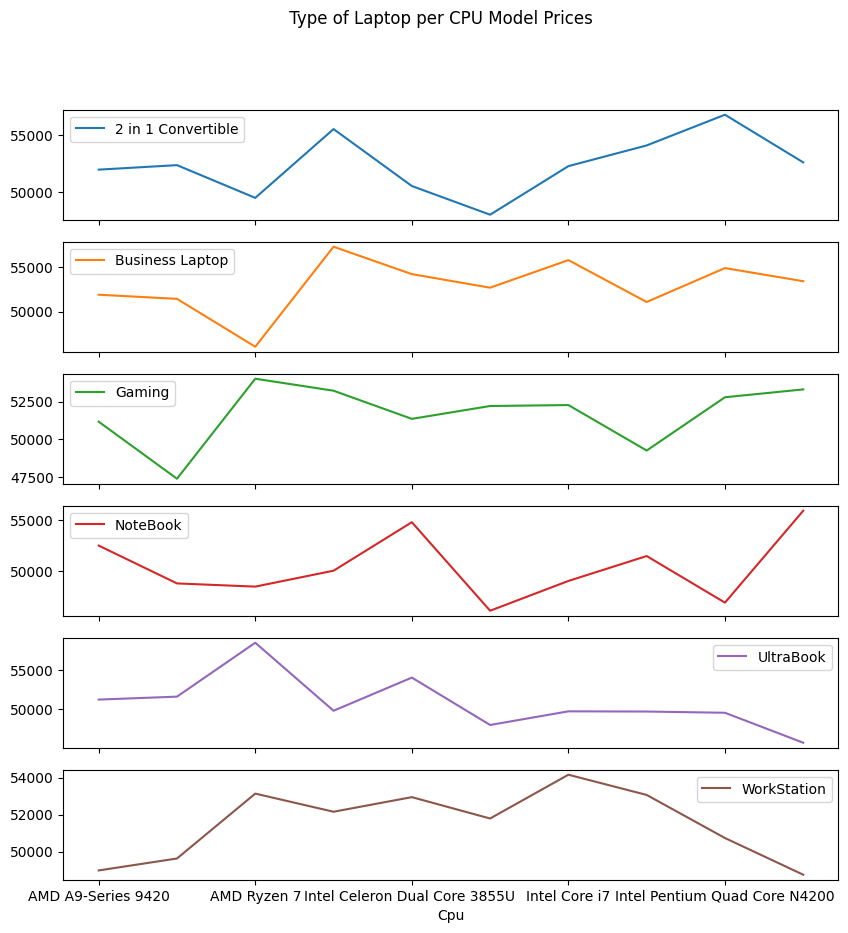

In [45]:
media_preco_cpu.plot(subplots=True, figsize=(10, 10), title=' Type of Laptop per CPU Model Prices')

# Cleaning Data


In [46]:
data.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [49]:
data.round(2)

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.04,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.06,35844.10
1,Chuwi,2 in 1 Convertible,16.54,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.06,37019.06
2,hp,WorkStation,17.30,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.90,33329.36
3,MSI,2 in 1 Convertible,11.53,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.91,68631.10
4,Microsoft,Gaming,12.65,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.34,33842.48
...,...,...,...,...,...,...,...,...,...,...,...
995,hp,Gaming,16.24,HD 1920x1080,AMD A9-Series 9420,8GB,128GB SSD,AMD Radeon RX 5600M,Windows 10,4.69,40254.53
996,Microsoft,WorkStation,17.45,4K,Intel Celeron Dual Core 3855U,8GB,2TB SATA SSD,NVIDIA GeForce GTX 1650,macOS,3.93,57272.70
997,lenevo,NoteBook,13.76,HD 1920x1080,AMD Ryzen 7,16GB,128GB PCIe SSD,NVIDIA GeForce GTX 1650,Windows 10,4.05,48214.61
998,Asus,UltraBook,11.04,IPS Panel Retina Display 2560x1600,Intel Core i9,12GB,1TB Fusion Drive,Intel Iris Xe Graphics,No OS,3.67,58926.55


In [78]:
data['numericalRam'] = data.Ram.str.replace('GB', '')
data = data.drop('numericRam', axis=1)
data.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,NumericalMemory,NumericalCpu,numericalRam
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512,7,12
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128,5,12
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,1,3 1505,8
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512,7,16
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512,5,8


In [79]:
# changing memory column to numerical
data['NumericalMemory'] = data['Memory'].str.replace('[a-zA-Z]', '', regex=True)
data.NumericalMemory = data.NumericalMemory.astype(np.int64)
data.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,NumericalMemory,NumericalCpu,numericalRam
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512,7,12
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128,5,12
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,1,3 1505,8
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512,7,16
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512,5,8


In [86]:
# changing cpu column to numerical
data['NumericalCpu'] = data.Cpu.str.replace('[a-zA-Z\- ]', '', regex=True)
data.NumericalCpu
data.head()


,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,NumericalMemory,NumericalCpu,numericalRam
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512,7,12
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128,5,12
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,1,31505,8
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512,7,16
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512,5,8


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
 11  NumericalMemory   1000 non-null   int64  
 12  NumericalCpu      1000 non-null   object 
 13  numericalRam      1000 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 109.5+ KB


In [89]:
# changing the types of the new columns
data.NumericalCpu = data.NumericalCpu.astype(np.int64)
data.numericalRam = data.numericalRam.astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
 11  NumericalMemory   1000 non-null   int64  
 12  NumericalCpu      1000 non-null   int64  
 13  numericalRam      1000 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 109.5+ KB


In [93]:
data.corr()

<ipython-input-93-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Inches,Weight,Price,NumericalMemory,NumericalCpu,numericalRam
Inches,1.000000,0.037982,-0.012535,-0.072276,0.018791,-0.014286
Weight,0.037982,1.000000,-0.024256,-0.023323,-0.020044,-0.039935
Price,-0.012535,-0.024256,1.000000,0.060936,0.017657,0.063615
NumericalMemory,-0.072276,-0.023323,0.060936,1.000000,-0.012299,0.011465
NumericalCpu,0.018791,-0.020044,0.017657,-0.012299,1.000000,0.009385
numericalRam,-0.014286,-0.039935,0.063615,0.011465,0.009385,1.000000


<ipython-input-94-4296931acbe6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f')


<Axes: >

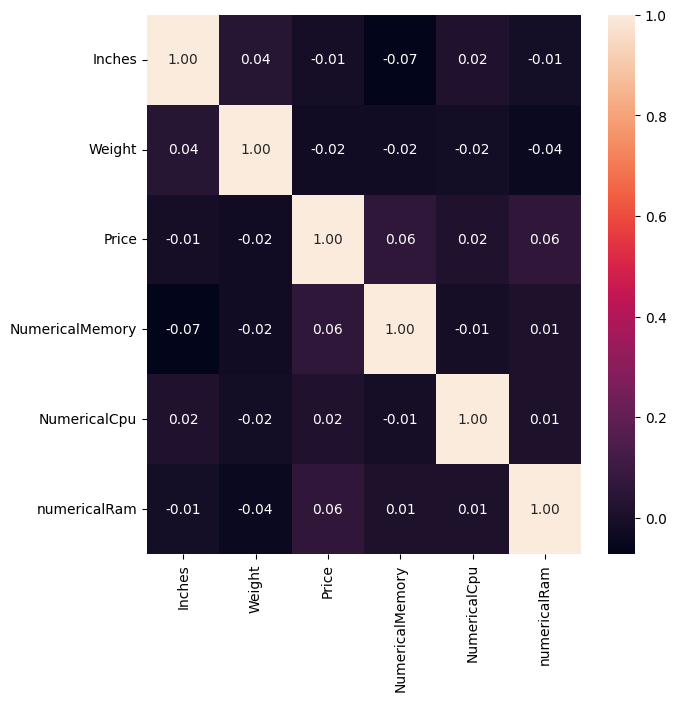

In [94]:
import seaborn as sns
plt.figure(figsize=(7, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f')